In [2]:
from __future__ import division
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('hot100.csv')

'''
df$key <- (df$key)/max(df$key, na.rm = T)
df$tempo <- (df$tempo)/max(df$tempo, na.rm = T)
df$time_signature <- (df$time_signature)/max(df$time_signature, na.rm = T)
'''
def normalize_cols(df):
    cols = ['key', 'tempo', 'time_signature']
    for col in cols:
        df['raw_'+col] = df[col]
        df[col] = df[col] / df[col].max()

normalize_cols(df)
#df['tempo'] = (tempo - tempo.min())/(tempo.max()-tempo.min())

from datetime import timedelta as td, date
# e.g. 23/5/13
date_fmt = '%d/%m/%y'
df['datestr'] = df['entrance_date']
df['entrance_date'] = pd.to_datetime(df['entrance_date'], format=date_fmt)
future = df['entrance_date'] > date(year=2050,month=1,day=1)
df.loc[future, 'entrance_date'] -= td(days=365.25*100)

In [76]:
if 0:
    # e.g. 23/5/13
    date_fmt = '%d/%m/%y'
    dfx['entrance_date'] = pd.to_datetime(dfx['datestr'], format=date_fmt)
    future = dfx['entrance_date'] > date(year=2050,month=1,day=1)
    dfx.loc[future, 'entrance_date'] -= td(days=365.25*100)

In [4]:
df['raw_time_signature'].value_counts()

4    22500
3     1801
1      315
5      212
7       31
0        6
Name: raw_time_signature, dtype: int64

In [4]:
df['raw_mode'].value_counts()

1    18508
0     6357
Name: mode, dtype: int64

In [6]:
df.sort_values(by='entrance_date').head(3).T

,50,46,47
artist,McGuire Sisters,Dale Wright,Jill Corey
track,"Volare (Nel Blu, Dipinto Di Blue)",Please Don't Do It,Big Daddy
Year,1958,1958,1958
entrance_date,1958-01-09 00:00:00,1958-01-09 00:00:00,1958-01-09 00:00:00
peak,80,77,96
wksoncharts,1,5,2
d_genre1,Pop,Rock,Pop
d_style1,Vocal,Rock & Roll,NaN
key,0.727273,0.636364,0
energy,0.143595,0.499864,0.399333


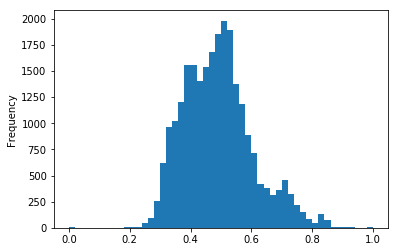

In [9]:
df['tempo'].plot.hist(bins=50);

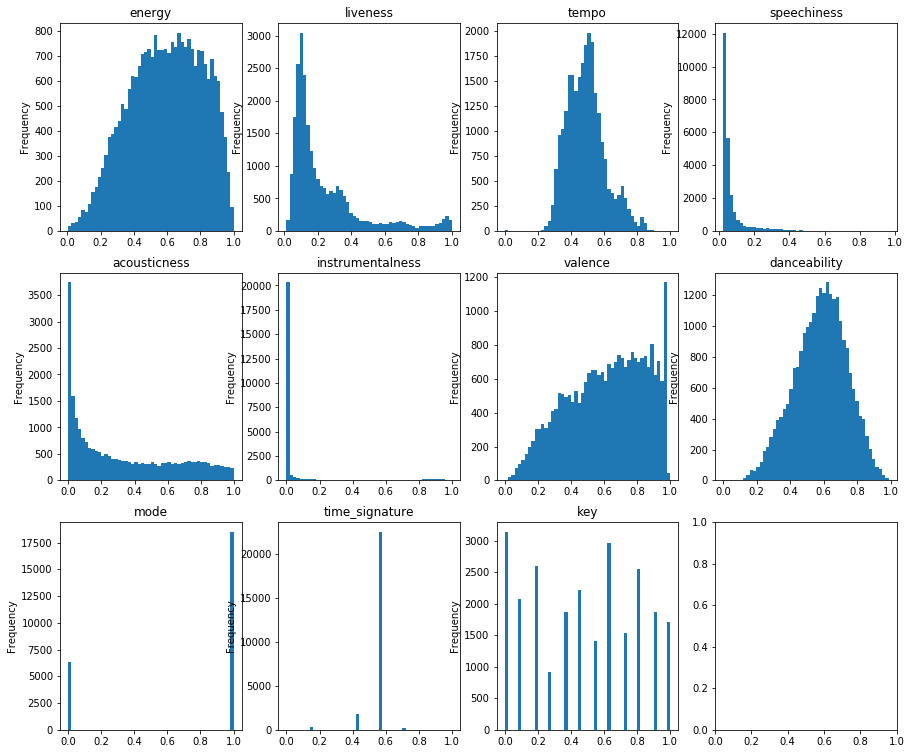

In [16]:
good_sonic_attrs = ('energy liveness tempo speechiness acousticness instrumentalness '
                       'valence danceability'
                      ).split()
bad_sonic_attrs = ['mode', 'time_signature', 'key']
numeric_sonic_attrs = good_sonic_attrs + bad_sonic_attrs
nsa = numeric_sonic_attrs

FS = (15, 13)
fig, axes = plt.subplots(3, 4, figsize=FS)

for i, attr in enumerate(nsa):
    ax = axes.flatten()[i]
    df[attr].plot.hist(ax=ax, bins=50)
    ax.set_title(attr)

In [64]:
df['entrance_date'].describe()

count                   24865
unique                   2990
top       1998-05-12 00:00:00
freq                       59
first     1958-01-09 00:00:00
last      2016-12-03 00:00:00
Name: entrance_date, dtype: object

In [10]:
df.groupby('artist').size().sort_values(ascending=False).head(5)

artist
Glee Cast          157
Elvis Presley      103
James Brown         91
Aretha Franklin     71
Ray Charles         71
dtype: int64

In [48]:
cols = ['track', 'Year', 'entrance_date', 'd_genre1', 'typicality']
df[df['artist']=='Michael Jackson'].sort_values(by='entrance_date')[cols].head(5)

,track,Year,entrance_date,d_genre1,typicality
8277,Got To Be There,1971,1971-10-30,Funk / Soul,0.780803
8695,Ben,1972,1972-05-08,Funk / Soul,0.820594
8596,I Wanna Be Where You Are,1972,1972-05-27,Funk / Soul,0.747592
8478,Rockin' Robin,1972,1972-11-03,Funk / Soul,0.878793
9069,With A Child's Heart,1973,1973-05-05,Funk / Soul,0.694590


In [5]:
def artist_lookup(artist):
    return df[df['artist']==artist].sort_values(by='entrance_date')

In [26]:
# scratch
hd = df.head(3)
things = []
def foo(t):
    things.append(t)
print len(df)
hd.apply(foo, axis=1)
print len(things)

24865
3


'Bill Haley & His Comets'

In [44]:
from scipy import spatial

good_sonic_attrs = ('energy liveness tempo speechiness acousticness instrumentalness '
                       'valence danceability'
                      ).split()
bad_sonic_attrs = ['mode', 'time_signature', 'key']
numeric_sonic_attrs = good_sonic_attrs + bad_sonic_attrs
nsa = numeric_sonic_attrs

# slooooooow
def add_mean_attrs(df):
    for date in df['entrance_date'].value_counts().index:
        idate = df['entrance_date'] == date
        if date.year == 1958:
            iprev = df['Year'] == 1958
        else:
            delta = date - df['entrance_date']
            iprev = (delta > td(days=0)) & (delta <= td(days=365))
        for sonic in nsa:
            col = 'mean_{}'.format(sonic)
            df.loc[idate, col] = df.loc[iprev, sonic].mean()

# probably gonna be even slower than above
def add_typicalities(df):
    df['typicality_orig'] = df['typicality']
    df['typicality_all'] = df.apply(lambda song: get_typicality(song, nsa, df), axis=1)
    df['typicality'] = df.apply(lambda song: get_typicality(song, good_sonic_attrs, df), axis=1)

def get_neighbouring_songs(song, df):
    # TODO: this might be too strict (may want to include songs that entered more than
    # a year earlier, but remained long enough to be on the charts during prev year)
    delta = song.entrance_date - df['entrance_date']
    iprev = (delta > td(days=0)) & (delta <= td(days=365))
    return df.loc[iprev]

def get_typicality(song, sonic_cols, df):
    if song.peak != 1:
        return None
    neighbs = get_neighbouring_songs(song, df)
    return neighbs.apply(lambda n: similarity(song, n, sonic_cols), axis=1).mean()
            
def preprocess(df):
    df = df.copy()
    add_mean_attrs(df)
    add_typicalities(df)
    df = df[df['peak']==1]
    return df

def sonic_vector(song, sonic_cols=nsa):
    return [song[sonic] for sonic in sonic_cols]
    
def similarity(s1, s2=None, sonic_cols=nsa):
    """Pass me 2 rows, or a dataframe with 2 rows
    """
    if s2 is None:
        assert len(s1) == 2
        s1, s2 = list(s1.itertuples())
    #v1, v2 = map(lambda s: sonic_vector(s, sonic_cols), [s1, s2])
    # maybe a wee bit faster?
    v1, v2 = map(lambda s: s[sonic_cols], [s1, s2])
    return 1 - spatial.distance.cosine(v1, v2)

CPU times: user 268 ms, sys: 0 ns, total: 268 ms
Wall time: 264 ms


In [45]:
%%time
# without typicality recalculation: ~3 min
# with: ~10min
dfx = preprocess(df)

CPU times: user 9min 36s, sys: 1.02 s, total: 9min 37s
Wall time: 9min 36s


In [46]:
dfx.head(3).T

,30,65,89
artist,Tommy Edwards,Conway Twitty,Teddy Bears
track,It's All In The Game,It's Only Make Believe,"To Know Him, Is To Love Him"
Year,1958,1958,1958
entrance_date,1958-08-18 00:00:00,1958-09-15 00:00:00,1958-09-22 00:00:00
peak,1,1,1
wksoncharts,22,21,23
d_genre1,Rock,Funk / Soul,Rock
d_style1,Blues Rock,Rock & Roll,Rock & Roll
key,0.272727,1,0.181818
energy,0.269397,0.268559,0.217606


In [80]:
dfx[dfx['artist']=='Taylor Swift']

,artist,track,Year,entrance_date,peak,wksoncharts,d_genre1,d_style1,key,energy,...,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_valence,mean_danceability,mean_mode,mean_time_signature,mean_key,typicality_orig,typicality_all
23700,Taylor Swift,We Are Never Ever Getting Back Together,2012,2012-08-25,1,24,Rock,Pop Rock,0.636364,0.450977,...,0.098006,0.156449,0.013388,0.507142,0.589185,0.714286,0.567718,0.498465,0.853033,0.865533


In [ ]:
## Semantics of Year?

In [82]:
dfx[dfx['Year']==2014].sort_values(by='entrance_date')

,artist,track,Year,entrance_date,peak,wksoncharts,d_genre1,d_style1,key,energy,...,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_valence,mean_danceability,mean_mode,mean_time_signature,mean_key,typicality_orig,typicality_all
24307,John Legend,All Of Me,2014,2013-09-21,1,59,Electronic,RnB/Swing,0.727273,0.264305,...,0.093114,0.142457,0.011339,0.507684,0.612600,0.687500,0.571003,0.460768,0.750519,0.755239
24376,Katy Perry,Dark Horse,2014,2013-10-05,1,57,Electronic,Synth-pop,0.545455,0.587246,...,0.094579,0.149925,0.009499,0.504877,0.595782,0.665615,0.570527,0.468024,0.880773,0.876875
24643,Pitbull,Timber,2014,2013-10-26,1,39,Electronic,House,1.000000,0.962920,...,0.090773,0.143358,0.008826,0.511048,0.622566,0.678344,0.571429,0.475391,0.873619,0.880085
24633,Pharrell,Happy,2014,2014-01-18,1,47,Pop,Vocal,0.090909,0.757261,...,0.095999,0.142502,0.007755,0.506859,0.620066,0.702624,0.569346,0.491651,0.851615,0.858699
24234,Iggy Azalea,Fancy,2014,2014-03-22,1,39,Electronic,Pop Rap,0.727273,0.707113,...,0.094896,0.141618,0.011613,0.498784,0.623619,0.713836,0.567385,0.479703,0.872638,0.884293
24493,MAGIC!,Rude,2014,2014-05-10,1,41,Electronic,Breakbeat,0.090909,0.807112,...,0.093670,0.176044,0.007030,0.511381,0.630682,0.725490,0.568161,0.493761,0.860137,0.865485
24519,Meghan Trainor,All About That Bass,2014,2014-07-26,1,47,Rock,Reggae-Pop,0.818182,0.878953,...,0.097620,0.168533,0.011508,0.499181,0.629196,0.742765,0.568672,0.493131,0.885932,0.893395


In [84]:
#dfx.groupby('Year').size()

In [86]:
dfx['typical_typicality'] = dfx['typicality'].rolling(20, min_periods=1).mean()

In [88]:
dfx['typical_typicality_orig'] = dfx['typicality_orig'].rolling(20, min_periods=1).mean()

In [96]:
ct = dfx[dfx['track']=='Come Together']
ct_cp = ct.iloc[0].copy()
ct_cp.track = 'Come Together (fixed tempo)'
ct_cp.raw_tempo /= 2
ct_cp.tempo /= 2
dfx = pd.concat([dfx, ct_cp.to_frame().T])

In [102]:
ct = dfx.iloc[-1]
ix = dfx['track'] == 'Come Together (fixed tempo)'
dfx.loc[ix, 'typicality'] = get_typicality(ct, good_sonic_attrs, dfx)
dfx.loc[ix, 'typicality_all'] = get_typicality(ct, nsa, dfx)

In [104]:
dfx.to_csv('number_ones.csv', index=False)

In [91]:
df.sort_values(by='raw_tempo', ascending=False).head(10)

,artist,track,Year,entrance_date,peak,wksoncharts,d_genre1,d_style1,key,energy,...,instrumentalness,mode,time_signature,valence,danceability,typicality,raw_key,raw_tempo,raw_time_signature,datestr
2843,Kenny Chandler,Heart! (I Hear You Beating),1963,1963-06-04,64,7,Pop,Doo Wop,0.181818,0.222911,...,0.000000,1,0.428571,0.823771,0.462505,0.849624,2,242.510,3,6/4/63
5743,Turtles,You Know What I Mean,1967,1967-05-08,12,11,Rock,Classic Rock,0.363636,0.645357,...,0.905037,1,0.571429,0.684637,0.158156,0.788203,4,239.876,4,5/8/67
20486,Obie Trice,The Set Up,2004,2004-10-01,73,4,Hip Hop,Gangsta,0.545455,0.251481,...,0.000001,1,1.000000,0.835843,0.482984,0.782473,6,239.294,7,10/1/04
13351,Patrick Simmons,So Wrong,1983,1983-03-19,30,13,Funk / Soul,Disco,0.818182,0.524081,...,0.082174,0,0.571429,0.776190,0.571071,0.744973,9,234.250,4,19/3/83
6052,Elvis Presley,Guitar Man,1968,1968-01-27,43,6,Pop,Vocal,0.090909,0.391708,...,0.938411,1,0.571429,0.192181,0.466590,0.682744,1,229.672,4,27/1/68
3953,Waikikis,Hawaii Tattoo,1965,1964-05-12,33,9,Jazz,Easy Listening,0.909091,0.562294,...,0.926882,1,0.571429,0.893340,0.361995,0.828034,10,226.341,4,5/12/64
1001,Fleetwoods,Runaround,1960,1960-05-23,23,13,Pop,Vocal,0.000000,0.033521,...,0.137613,1,0.571429,0.233214,0.323375,0.779637,0,225.468,4,23/5/60
15645,Sweet Sensation,Sincerely Yours,1989,1989-04-02,14,18,Electronic,Freestyle,0.000000,0.654317,...,0.913952,1,1.000000,0.934210,0.478381,0.764963,0,225.280,7,4/2/89
6170,Archie Bell & The Drells,Tighten Up,1968,1968-03-30,1,15,Funk / Soul,NaN,0.090909,0.456952,...,0.844844,1,0.428571,0.962121,0.506123,0.789989,1,219.381,3,30/3/68
11147,L.T.D.,(Every Time I Turn Around) Back In Love Again,1977,1977-10-15,4,19,Funk / Soul,NaN,0.909091,0.452648,...,0.022167,0,0.571429,0.960488,0.564845,0.717937,10,218.689,4,15/10/77


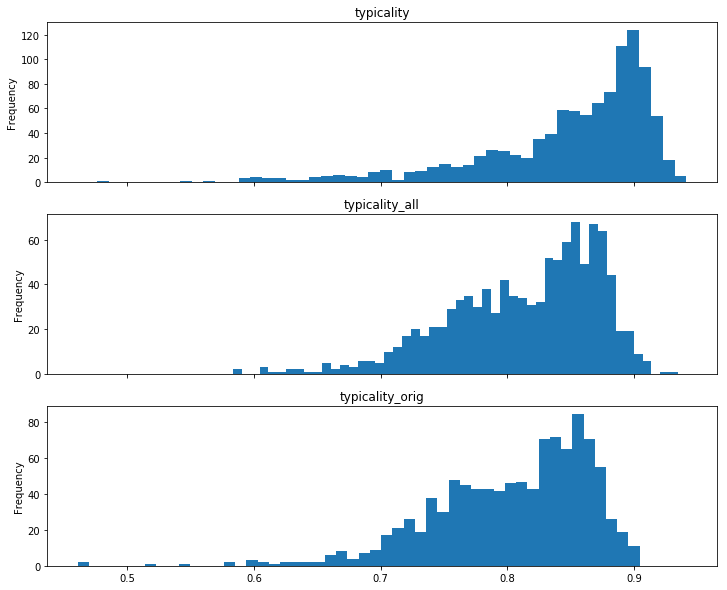

In [59]:
typicality_cols = ['typicality', 'typicality_all', 'typicality_orig']
FS = (12, 10)
fig, axes = plt.subplots(3, figsize=FS, sharex=True)
for (col, ax) in zip(typicality_cols, axes):
    dfx[col].plot.hist(ax=ax, bins=50)
    ax.set_title(col)

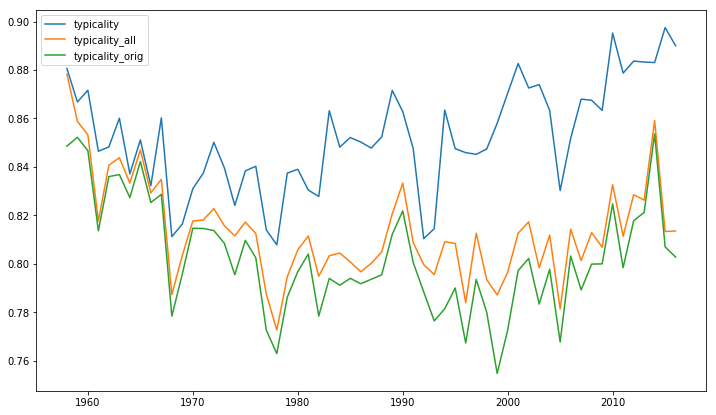

In [62]:
fig, ax = plt.subplots(figsize=(12,7))
typicality_cols = ['typicality', 'typicality_all', 'typicality_orig']
for col in typicality_cols:
    y = dfx.groupby('Year')[col].mean()
    ax.plot(y.index.values, y.values, label=col)
ax.legend();

In [139]:
# selfsim investigation
import seaborn as sns
import numpy as np

def selfsim(artist, song):
    if isinstance(song, basestring):
        song = df[df['track']==song].iloc[0]
    sims = {}
    tracks = df[df['artist']==artist]
    for track in tracks.itertuples():
        if track.track == song.track:
            sim = np.nan
        else:
            sim = similarity(song, track)
        sims[track.track] = sim
    return sims

def contrast_df(a1, a2):
    discog1, discog2 = df[df['artist']==a1], df[df['artist']==a2]
    rows = []
    for song in discog1.itertuples():
        row = selfsim(a2, song)
        rows.append(row)
    ix = discog1['track']
    cols = discog2['track']
    mat = pd.DataFrame(rows, index=ix)
    mat = mat.loc[:,cols]
    return mat

def contrast(a1, a2, avg=True, figsize=(13,10)):
    mat = contrast_df(a1, a2)
    if avg:
        mat['avg'] = mat.mean(axis=1)
        avg_row = mat.mean().to_frame(name='avg').T
        mat = pd.concat([mat,avg_row])
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(mat, annot=True, ax=ax, vmin=0.7, vmax=1.0, cmap='OrRd')
    return ax

def intrast(artist, avg=True):
    return contrast(artist, artist, avg=avg)

def artist_selfsim(artist):
    # TODO: could just use contrast?
    tracks = df[df['artist']==artist]
    rows = []
    for track in tracks.itertuples():
        row = selfsim(artist, track)
        rows.append(row)
    mat = pd.DataFrame(rows, index=tracks['track'])
    # reorder cols
    cols = tracks['track']
    mat = mat.loc[:,cols]
    return mat

def othersims(artist):
    pass

In [95]:
artist = 'Gwen Stefani'
#selfsim(artist, 'What You Waiting For?')
mat = artist_selfsim(artist)
mat['avg'] = mat.mean(axis=1)
mat

,What You Waiting For?,Rich Girl,Hollaback Girl,Cool,Luxurious,Crash,Wind It Up,The Sweet Escape,4 In The Morning,Baby Don't Lie,Used To Love You,Make Me Like You,avg
track,,,,,,,,,,,,,
What You Waiting For?,1.000000,0.959349,0.835896,0.973615,0.958726,0.961851,0.967089,0.913512,0.947863,0.907377,0.958261,0.960524,0.945338
Rich Girl,0.959349,1.000000,0.867248,0.986711,0.986248,0.927107,0.987636,0.969298,0.967951,0.920971,0.869992,0.995205,0.953143
Hollaback Girl,0.835896,0.867248,1.000000,0.838032,0.869743,0.771986,0.850624,0.832407,0.867127,0.932650,0.770577,0.861866,0.858180
Cool,0.973615,0.986711,0.838032,1.000000,0.971481,0.968471,0.989167,0.965157,0.943235,0.901250,0.895718,0.985761,0.951550
Luxurious,0.958726,0.986248,0.869743,0.971481,1.000000,0.900487,0.979933,0.979552,0.981150,0.943696,0.881760,0.988027,0.953400
Crash,0.961851,0.927107,0.771986,0.968471,0.900487,1.000000,0.955325,0.883097,0.885352,0.840851,0.931834,0.916668,0.911919
Wind It Up,0.967089,0.987636,0.850624,0.989167,0.979933,0.955325,1.000000,0.967564,0.974115,0.905605,0.895967,0.980173,0.954433
The Sweet Escape,0.913512,0.969298,0.832407,0.965157,0.979552,0.883097,0.967564,1.000000,0.943354,0.896334,0.804575,0.977249,0.927675
4 In The Morning,0.947863,0.967951,0.867127,0.943235,0.981150,0.885352,0.974115,0.943354,1.000000,0.920152,0.883804,0.960525,0.939552


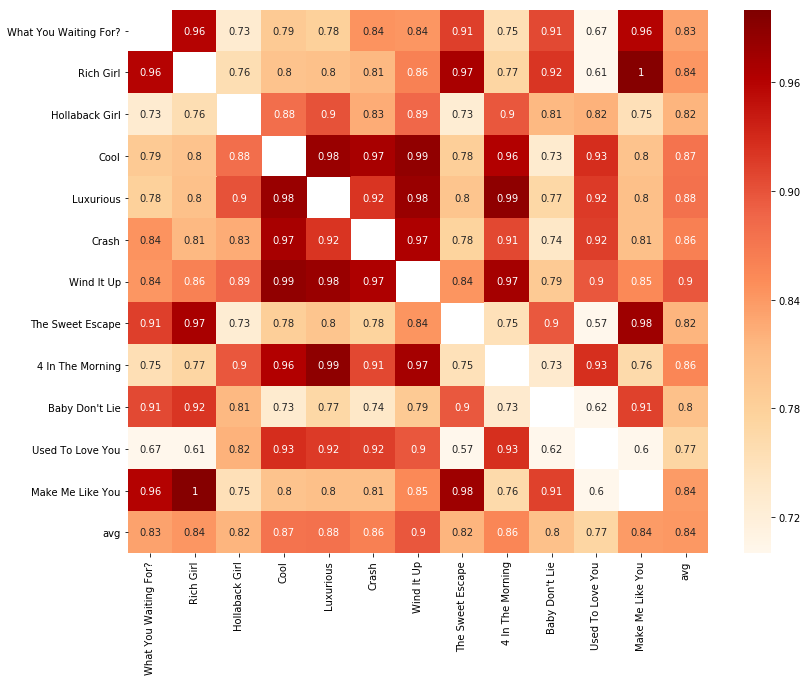

In [184]:
intrast('Gwen Stefani');

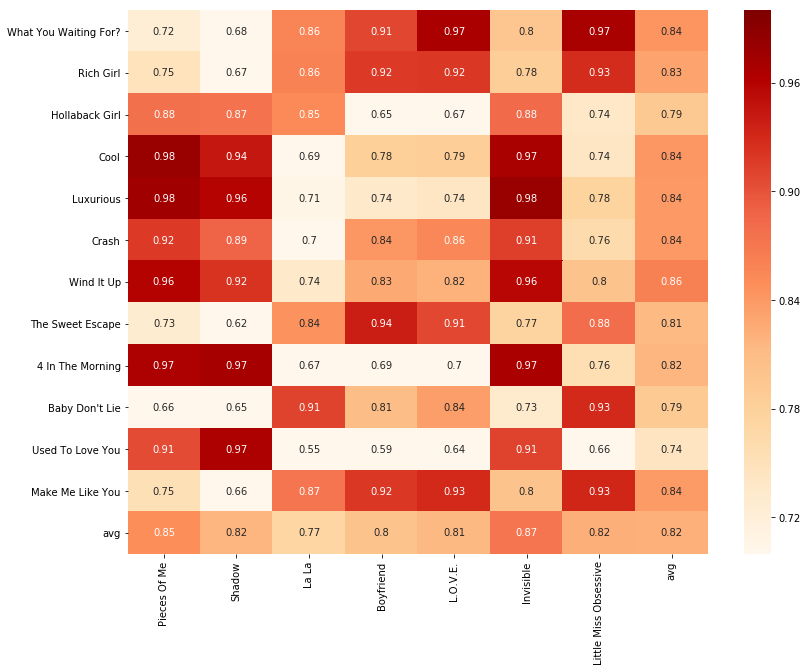

In [155]:
contrast('Gwen Stefani', 'Ashlee Simpson');

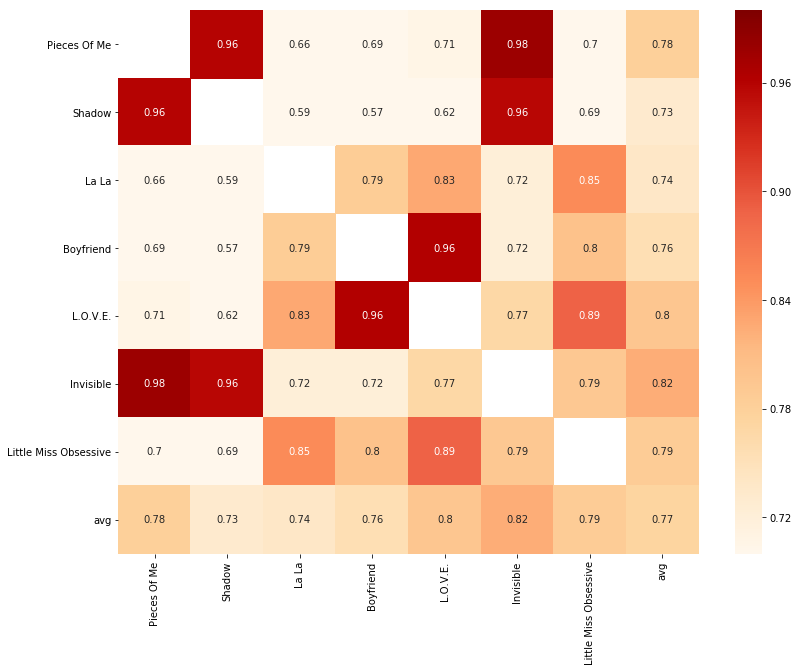

In [162]:
intrast('Ashlee Simpson');

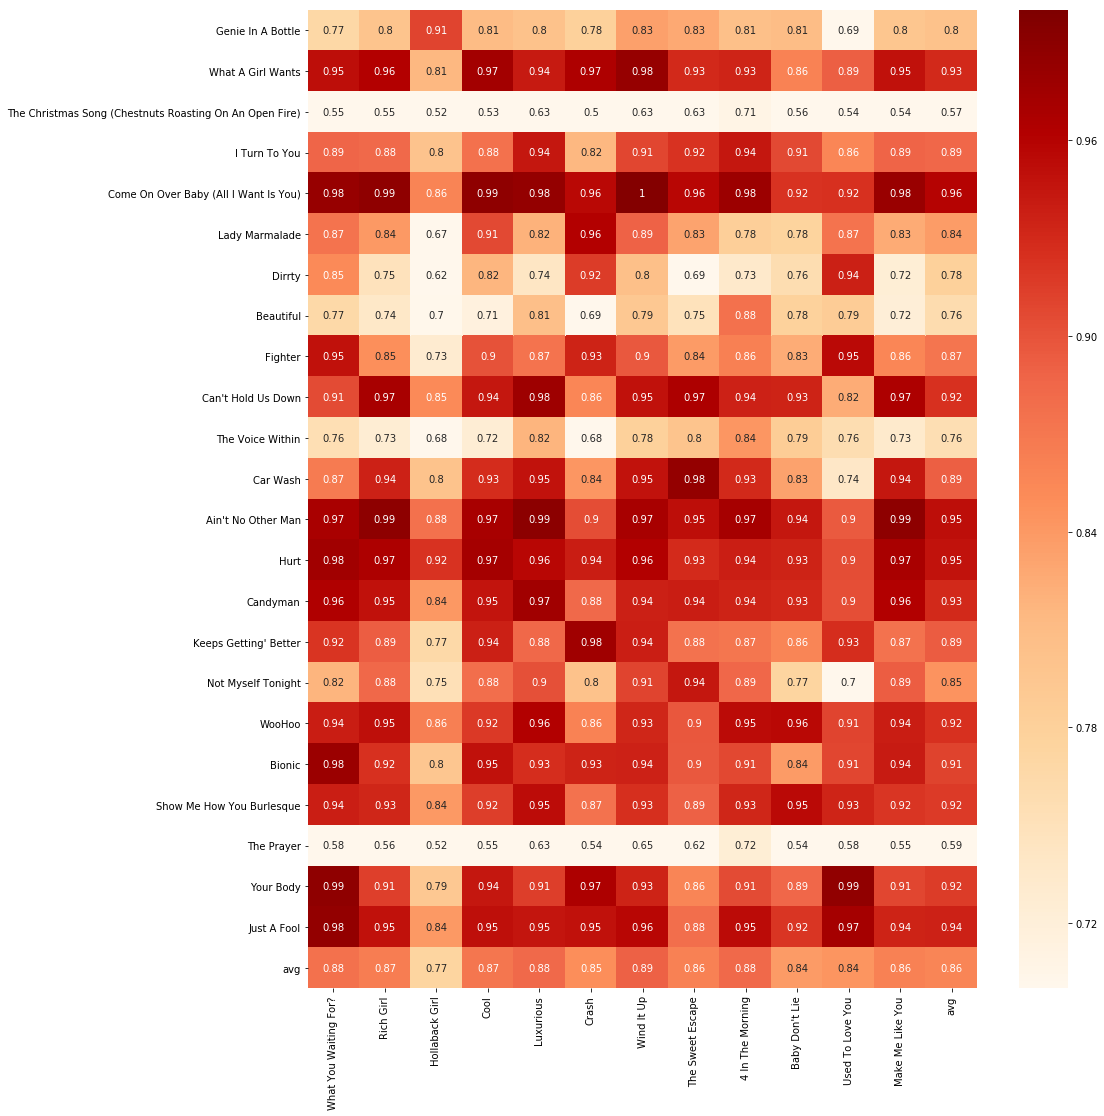

In [111]:
contrast('Christina Aguilera', 'Gwen Stefani', figsize=(15, 18));

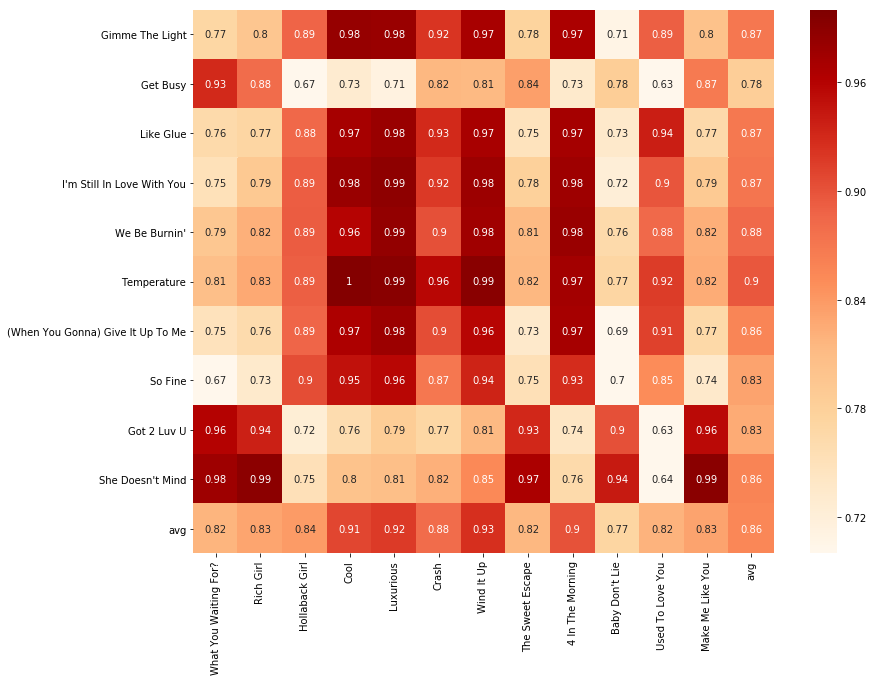

In [157]:
contrast('Sean Paul', 'Gwen Stefani');

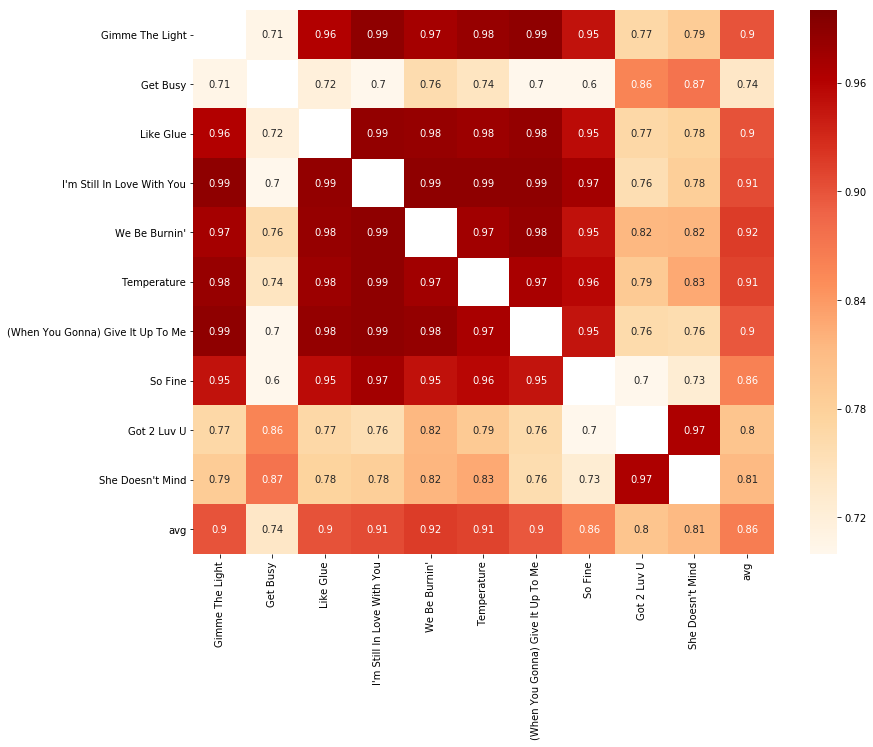

In [158]:
intrast('Sean Paul')

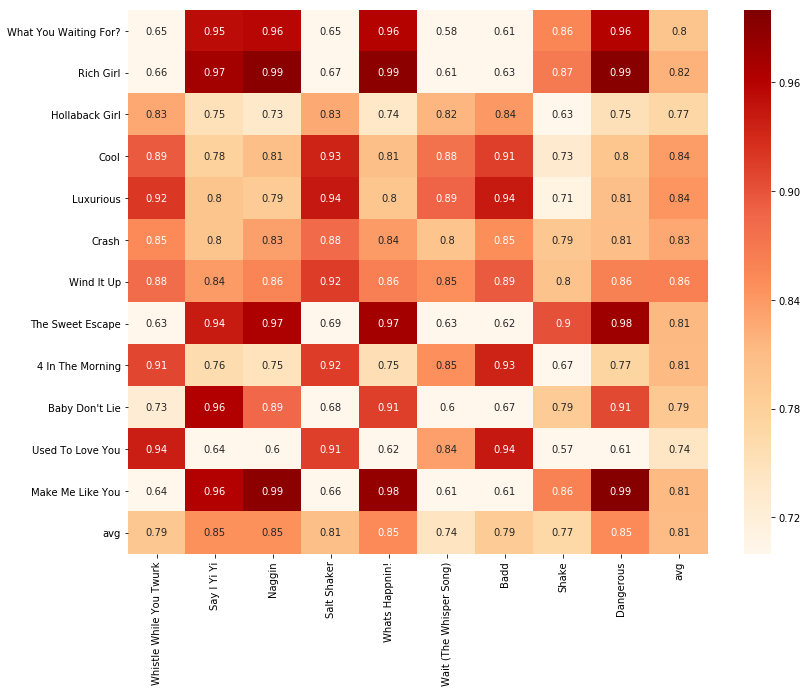

In [159]:
contrast('Gwen Stefani', 'Ying Yang Twins');

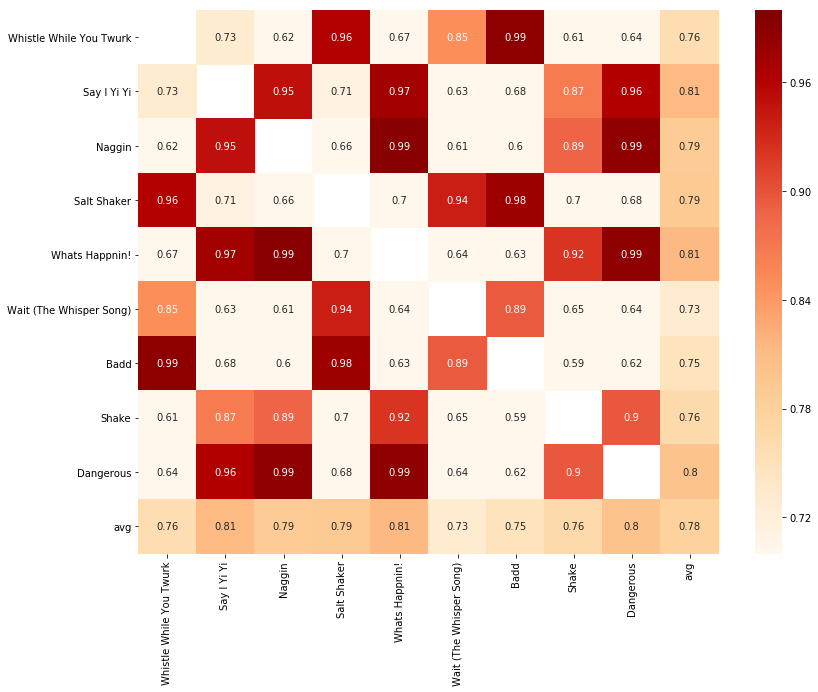

In [160]:
intrast('Ying Yang Twins');

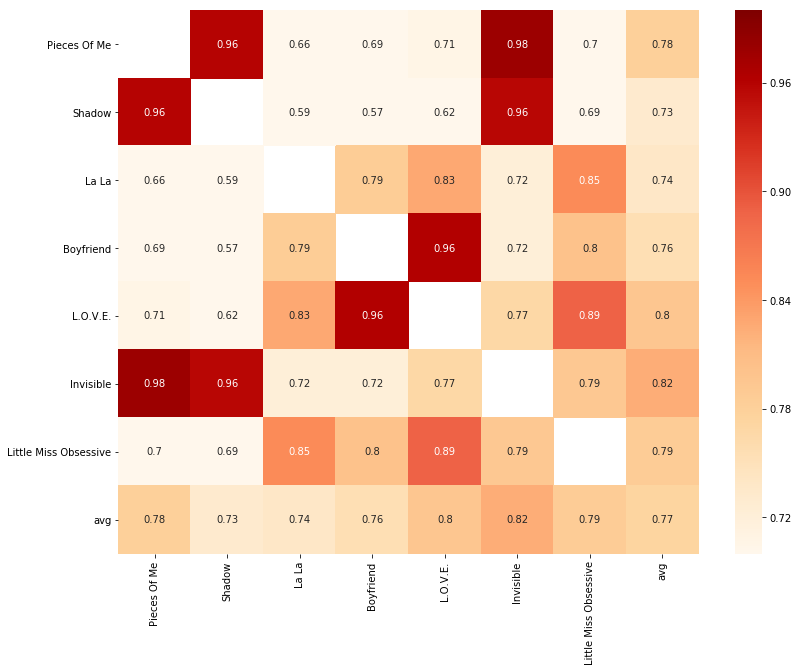

In [116]:
tracks = [
    'Wind It Up',
    'Come On Over Baby (All I Want Is You)'
]
pair = df[df['track'].isin(tracks)]
pair.T

,19469,21421
artist,Christina Aguilera,Gwen Stefani
track,Come On Over Baby (All I Want Is You),Wind It Up
Year,2000,2006
entrance_date,2000-05-08 00:00:00,2006-11-18 00:00:00
peak,1,6
wksoncharts,21,18
d_genre1,Electronic,Hip Hop
d_style1,UK Garage,RnB/Swing
key,8,1
energy,0.895389,0.91741


In [117]:
similarity(pair)

0.9963989299483349

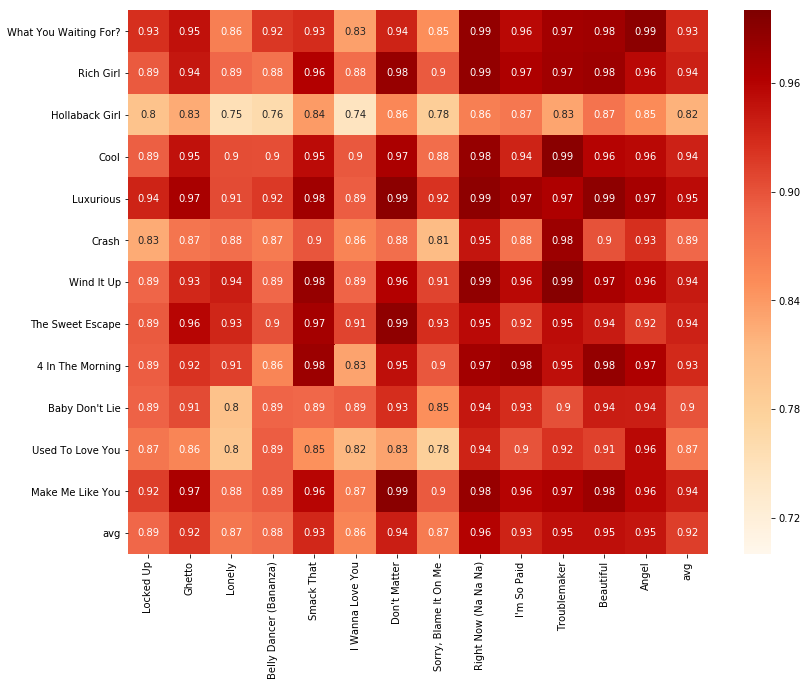

In [150]:
contrast('Gwen Stefani', 'Akon');

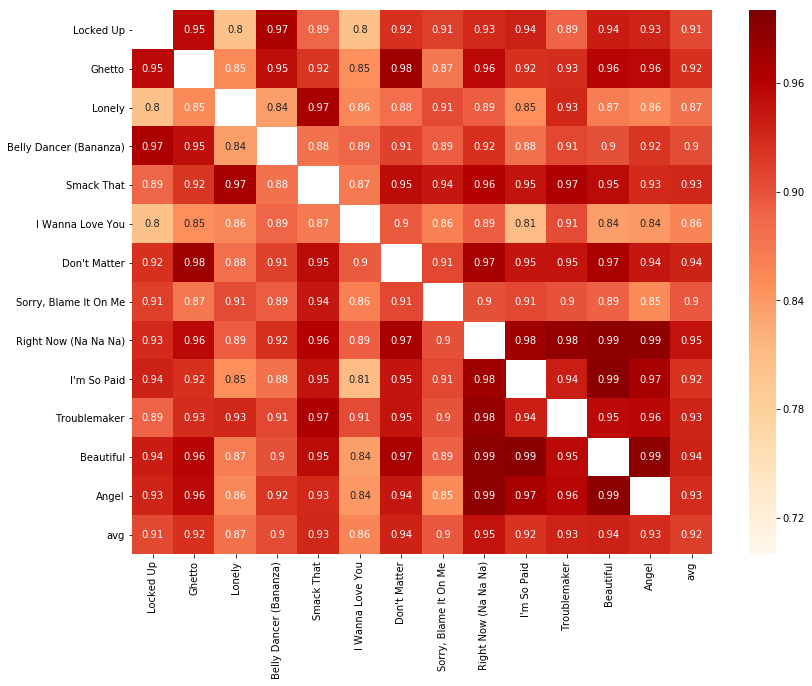

In [152]:
intrast('Akon');

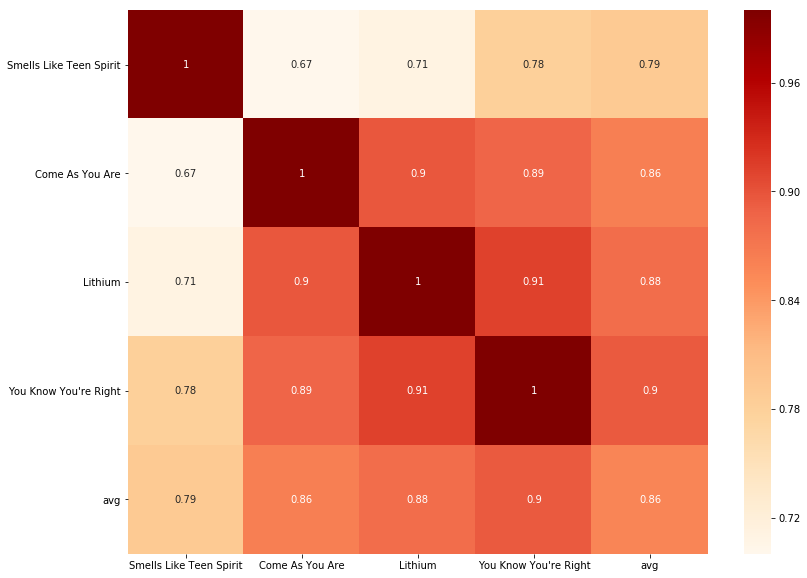

In [131]:
intrast('Nirvana')

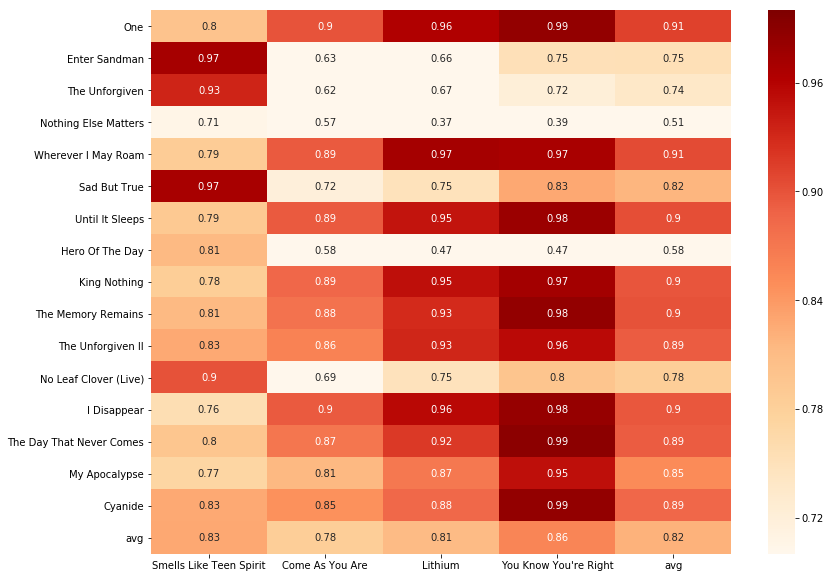

In [134]:
contrast('Metallica', 'Nirvana');

In [132]:
df.loc[
    (df['Year'] == 1992)
    & (df['d_genre1']=='Rock')
    , ['artist', 'track']
].head(50)

,artist,track
16614,Rod Stewart,Broken Arrow
16626,Storm,I've Got A Lot To Learn About Love
16629,Genesis,No Son Of Mine
16639,Motley Crue,Home Sweet Home '91
16645,Firehouse,All She Wrote
16663,Ozzy Osbourne,No More Tears
16669,Metallica,The Unforgiven
16670,Nirvana,Smells Like Teen Spirit
16680,Bryan Adams,There Will Never Be Another Tonight
16682,Guns N' Roses,Live And Let Die


In [148]:
df.loc[
    (df['Year'] >= 2004)
    & (df['Year'] <= 2006)
    & (df['d_genre1'] == 'Hip Hop')
    #, 'artist'
].groupby('artist').size().sort_values(ascending=False).head(35)

artist
Eminem                8
Nelly                 7
Ludacris              7
T.I.                  7
Twista                7
Kanye West            7
50 Cent               6
R. Kelly              5
Mariah Carey          5
Ying Yang Twins       5
Jay-Z                 5
Game                  5
Mary J. Blige         5
Juvenile              4
OutKast               4
Dem Franchize Boyz    4
Snoop Dogg            4
Gwen Stefani          4
Young Jeezy           4
Usher                 4
Chingy                4
Akon                  4
Janet Jackson         3
Sean Paul             3
Black Eyed Peas       3
Lloyd Banks           3
LL Cool J             3
Destiny's Child       3
Beyonce               3
Bow Wow               3
Ciara                 3
Lil Wayne             3
Pitbull               3
Ne-Yo                 3
Jadakiss              3
dtype: int64

In [149]:
artist_lookup('Akon')

,artist,track,Year,entrance_date,peak,wksoncharts,d_genre1,d_style1,key,energy,...,speechiness,acousticness,instrumentalness,mode,time_signature,valence,danceability,typicality,raw_tempo,datestr
20608,Akon,Locked Up,2004,2004-12-06,8,27,Hip Hop,RnB/Swing,7,0.693896,...,0.408766,0.042746,0.000000,1,4,0.512504,0.569118,0.844964,180.752,12/6/04
20830,Akon,Lonely,2005,2005-02-26,4,20,Hip Hop,Pop Rap,0,0.394678,...,0.059366,0.505159,0.000000,0,4,0.629651,0.603518,0.713642,90.099,26/2/05
20780,Akon,Ghetto,2005,2005-08-01,92,4,Funk / Soul,NaN,8,0.636105,...,0.051418,0.041204,0.000000,0,4,0.690177,0.607594,0.765543,187.333,8/1/05
20984,Akon,Belly Dancer (Bananza),2005,2005-08-13,30,20,Hip Hop,RnB/Swing,1,0.493676,...,0.289657,0.036138,0.000000,1,4,0.457775,0.620767,0.803990,200.011,13/8/05
21379,Akon,Smack That,2006,2006-07-10,2,30,Electronic,Hip Hop,5,0.777866,...,0.143986,0.474764,0.000000,0,4,0.875661,0.903377,0.782307,120.007,7/10/06
21386,Akon,I Wanna Love You,2006,2006-10-14,1,29,Hip Hop,RnB/Swing,7,0.226753,...,0.040002,0.029474,0.000033,1,4,0.370591,0.862998,0.817517,102.014,14/10/06
21492,Akon,Don't Matter,2007,2007-03-02,1,23,Funk / Soul,NaN,10,0.557051,...,0.042842,0.045752,0.000000,0,4,0.688841,0.741911,0.766458,126.948,3/2/07
21679,Akon,"Sorry, Blame It On Me",2007,2007-04-08,7,19,Hip Hop,RnB/Swing,7,0.387826,...,0.423532,0.270690,0.000058,1,4,0.524820,0.675023,0.837804,87.957,4/8/07
22112,Akon,I'm So Paid,2008,2008-10-25,31,20,Hip Hop,Thug Rap,11,0.874103,...,0.211907,0.120785,0.000000,1,4,0.534605,0.680797,0.849074,91.898,25/10/08
22091,Akon,Right Now (Na Na Na),2008,2008-11-10,8,22,Hip Hop,RnB/Swing,8,0.855265,...,0.098983,0.083042,0.000000,0,4,0.666450,0.818681,0.786672,131.110,11/10/08


In [164]:
cols = ['artist', 'track', 'mode']
df.loc[
    (df['Year']==2016)
    , cols
].head(50)

,artist,track,mode
23780,2 Chainz,Watch Out,1
23781,2 Chainz,Gotta Lotta,0
23808,Adele,When We Were Young,0
23809,Adele,All I Ask,1
23814,Alessia Cara,Here,1
23815,Alessia Cara,Wild Things,1
23865,Belly,Might Not,1
23894,Blake Shelton,Came Here To Forget,0
23903,Brad Paisley,Country Nation,1
23915,Brett Eldredge,Drunk On Your Love,1


In [182]:
cols = ['artist', 'track', 'mode', 'd_genre1']
df.loc[
    (df['artist']=='Lady GaGa')
    , cols
].head(50)

,artist,track,mode,d_genre1
22037,Lady GaGa,Just Dance,0,Electronic
22204,Lady GaGa,Poker Face,0,Electronic
22265,Lady GaGa,LoveGame,1,Electronic
22454,Lady GaGa,Paparazzi,0,Electronic
22543,Lady GaGa,Bad Romance,1,Electronic
22586,Lady GaGa,Speechless,1,Electronic
22587,Lady GaGa,Telephone,0,Electronic
22714,Lady GaGa,Alejandro,0,Electronic
23108,Lady GaGa,Born This Way,0,Electronic
23198,Lady GaGa,Judas,1,Electronic


In [181]:
key_accuracy = [
    1, 1, 0, 1, 0, 1, 1, 
    # born this way...
    0, 0, 1,
    # hair,
    1, 1, 0,
    # applause, dope, dwuw
    1, 0, 1, 
    # venus, guy, tihty
    1, 1, 0
]
np.mean(key_accuracy)

0.63157894736842102

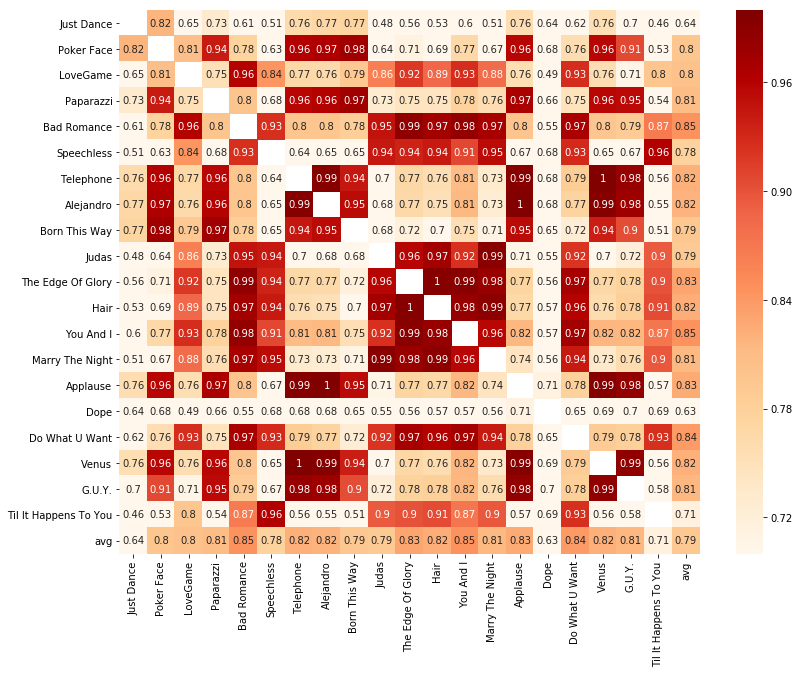

In [167]:

intrast('Lady GaGa');

In [171]:
cols = ['track', 'd_genre1', 'typicality']
artist_lookup('Gwen Stefani').loc[:,cols]

,track,d_genre1,typicality
20713,What You Waiting For?,Electronic,0.763724
20773,Rich Girl,Electronic,0.785942
20866,Hollaback Girl,Hip Hop,0.808877
21065,Luxurious,Hip Hop,0.825937
20956,Cool,Electronic,0.839921
21139,Crash,Hip Hop,0.835186
21421,Wind It Up,Hip Hop,0.844044
21473,The Sweet Escape,Electronic,0.774964
21632,4 In The Morning,Electronic,0.832221
24215,Baby Don't Lie,Electronic,0.749093


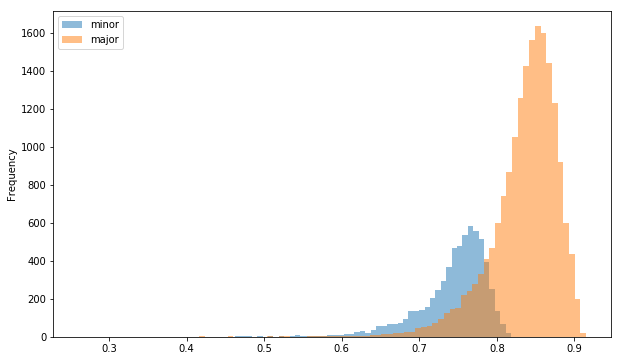

In [51]:
mn = df[df['mode']==0]
mj = df[df['mode']==1]
fig, ax = plt.subplots(figsize=(10,6))
mn['typicality'].plot.hist(bins=80, ax=ax, label='minor', alpha=.5)
mj['typicality'].plot.hist(bins=80, ax=ax, label='major', alpha=.5)
ax.legend();

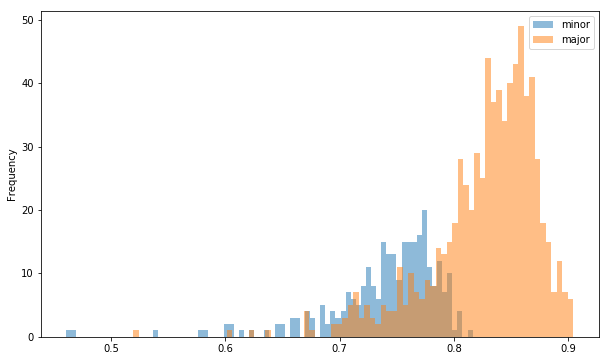

In [54]:
mn = df[(df['peak']==1) & (df['mode']==0)]
mj = df[(df['peak']==1) & (df['mode']==1)]
fig, ax = plt.subplots(figsize=(10,6))
mn['typicality'].plot.hist(bins=80, ax=ax, label='minor', alpha=.5)
mj['typicality'].plot.hist(bins=80, ax=ax, label='major', alpha=.5)
ax.legend();

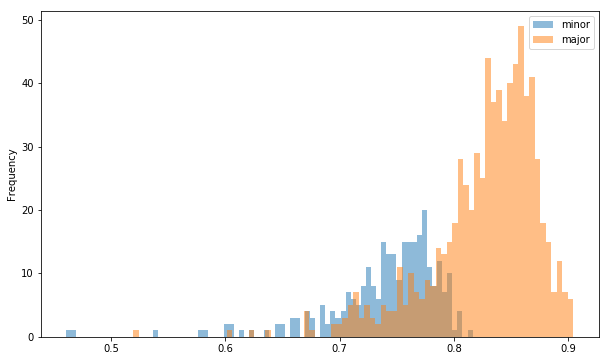

In [53]:
mn = dfx[dfx['mode']==0]
mj = dfx[dfx['mode']==1]
fig, ax = plt.subplots(figsize=(10,6))
mn['typicality_orig'].plot.hist(bins=80, ax=ax, label='minor', alpha=.5)
mj['typicality_orig'].plot.hist(bins=80, ax=ax, label='major', alpha=.5)
ax.legend();

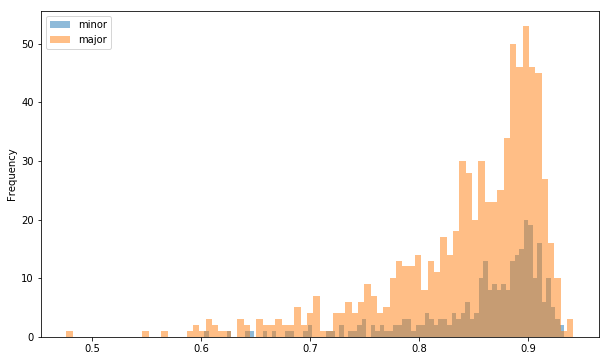

In [56]:
mn = dfx[dfx['mode']==0]
mj = dfx[dfx['mode']==1]
fig, ax = plt.subplots(figsize=(10,6))
mn['typicality'].plot.hist(bins=80, ax=ax, label='minor', alpha=.5)
mj['typicality'].plot.hist(bins=80, ax=ax, label='major', alpha=.5)
ax.legend();

In [183]:
df['typicality'].describe()

count    24865.000000
mean         0.811656
std          0.060543
min          0.260814
25%          0.772485
50%          0.826568
75%          0.857474
max          0.915165
Name: typicality, dtype: float64